fiat_dataframe: pandas DataFrame explorer
=========================================

Fiatlight provides `DataFrameWithGui`, a viewer for pandas dataframes that allows to sort, and visualize the data.
Composed with the advanced GUI creation capabilities of fiatlight, it can also filter data.

Example
-------

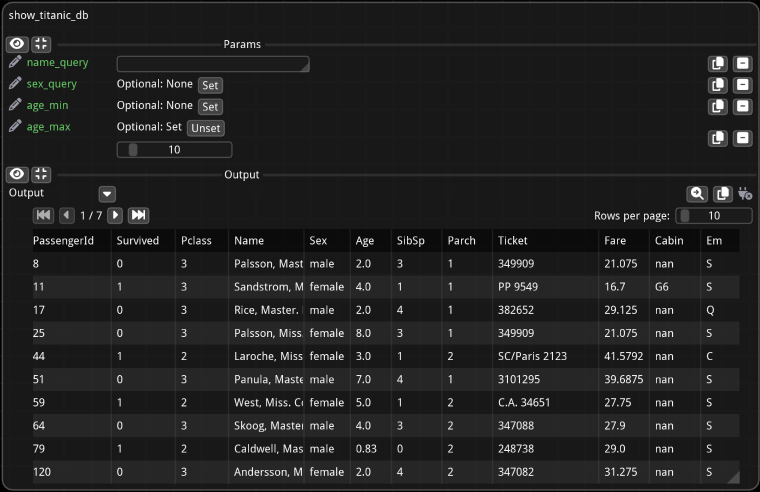

In [5]:
from fiatlight.fiat_kits.fiat_dataframe import dataframe_with_gui_demo_titanic
dataframe_with_gui_demo_titanic.main()

By clicking on the magnifier button ![popup_button.png](_static/images/popup_button.png) on top of the dataframe, you can open it in a popup where sorting options are available. Click on one column (or shift-click on multiple columns) to sort the data.

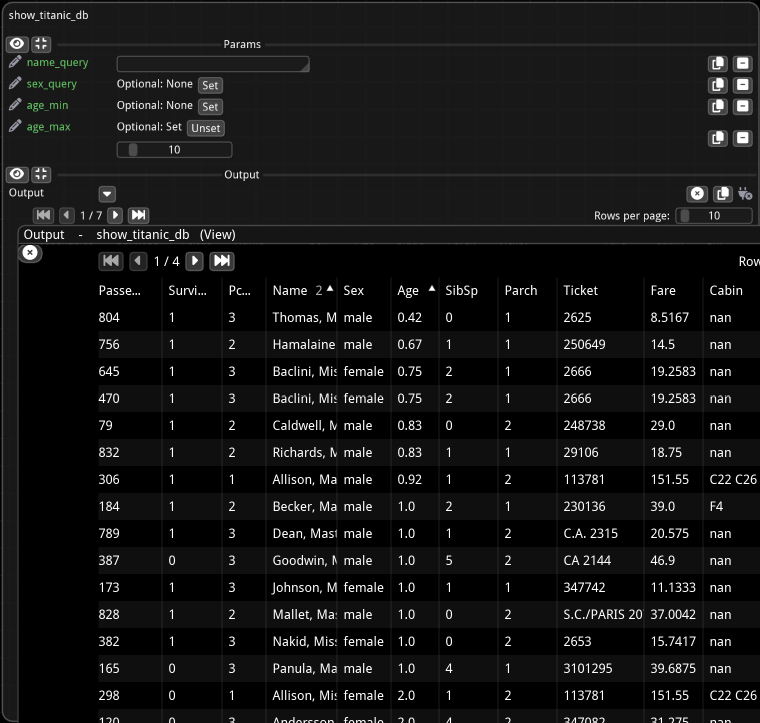

In [7]:
dataframe_with_gui_demo_titanic.main()

Custom attributes available for DataFrameWithGui
------------------------------------------------

Here is a list of all the possible customizations options:

In [10]:
%%bash
fiatlight gui DataFrameWithGui

GUI type: DataFrameWithGui
  A class to present a pandas DataFrame in the GUI, with pagination and other features. Open in a pop-up for more features

  Available custom attributes for DataFrameWithGui:
  --------------------------------------------------------------------------------
  +------------------------+---------------------+--------------+-----------------------------------------------+
  | Name                   | Type                | Default      | Explanation                                   |
  +========================+=====================+==============+===============================================+
  | widget_size_em         | tuple[float, float] | (50.0, 15.0) | Widget size in em units                       |
  +------------------------+---------------------+--------------+-----------------------------------------------+
  | column_widths_em       | dict                | {}           | Dictionary to specify custom widths for       |
  |                        |  

Source code for the example
---------------------------

In [11]:
import fiatlight
from fiatlight.fiat_doc import look_at_code  # noqa
%look_at_python_file fiat_kits/fiat_dataframe/dataframe_with_gui_demo_titanic.py

import fiatlight as fl
import pandas as pd
from enum import Enum


def make_titanic_df() -> pd.DataFrame:
    # Here, we provide an example data frame to the user,
    # using the Titanic dataset from the Data Science Dojo repository.
    # (widely used in data science tutorials)
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    try:
        df = pd.read_csv(url)
    except Exception as e:
        print(f"Error loading sample dataset: {e}")
        df = pd.DataFrame()  # Return an empty DataFrame in case of failure
    return df


class Sex(Enum):
    Man = "male"
    Woman = "female"


@fl.with_fiat_attributes(
    # define the custom attributes for the function parameters
    age_min__range=(0, 100),
    age_max__range=(0, 100),
    # define custom attributes for the function output
    # (i.e. the presentation options for the DataFrame)
    return__widget_size_em=(55.0, 15.0),
    return__rows_per_page_node=10,
    return__rows_per_page_popup=20,
    return__column_widths_em={"Name": 5},
)
def show_titanic_db(
    name_query: str = "", sex_query: Sex | None = None, age_min: int | None = None, age_max: int | None = None
) -> pd.DataFrame:
    dataframe = make_titanic_df()
    if dataframe.empty:
        return dataframe

    # filter dataframe
    if name_query:
        dataframe = dataframe[dataframe["Name"].str.contains(name_query, case=False)]
    if sex_query:
        dataframe = dataframe[dataframe["Sex"] == sex_query.value]
    if age_min is not None:
        dataframe = dataframe[dataframe["Age"] >= age_min]
    if age_max is not None:
        dataframe = dataframe[dataframe["Age"] <= age_max]

    return dataframe


def main() -> None:
    fl.run(show_titanic_db, app_name="dataframe_with_gui_demo_titanic")


if __name__ == "__main__":
    main()